# Analyzing 911 Calls from Pennsylvania


For this project, I will be analyzing the 911 calls coming from Montgomery Coutny in Pennsylvania. The kaggle data set can be found here: https://www.kaggle.com/datasets/mchirico/montcoalert

The following are the fields of this dataset: 
1. lat : String variable, Latitude
2. lng: String variable, Longitude
3. desc: String variable, Description of the Emergency Call
4. zip: String variable, Zipcode
5. title: String variable, Title
6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS
7. twp: String variable, Township
8. addr: String variable, Address
9. e: String variable, Dummy variable (always 1)

**We will be answering three main questions:**
Which day of the week we see the least amount of calls?
What time of the day we see the least amount of calls? 
Which day in particular during different season we spot more calls coming in?


## Data cleaning and prepping 

____
**Import numpy and pandas**

In [6]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [8]:
df= pd.read_csv('911.csv')

**Check the info() of the df**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**What are the top 5 zipcodes for 911 calls?**

In [12]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [14]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Creating a new field that specifies the Department - (It seperates the reasons/department attributes)**

In [23]:
x=df['title'].iloc[0]

In [25]:
x.split(':')[0]

'EMS'

In [27]:
df['Department']=df['title'].apply(lambda title:title.split(':')[0]) 

In [30]:
df['Department']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Department, Length: 99492, dtype: object

**What is the most common Reason for a 911 call ?**

In [33]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

**Creating a countplot of 911 calls by department**

<Axes: xlabel='Department', ylabel='count'>

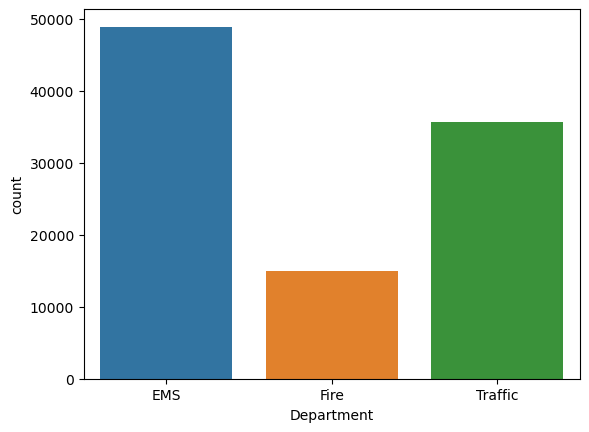

In [35]:
sns.countplot(x='Department', data=df)

**Since the date is an string type, so switching it to Datetime object**

In [36]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [44]:
time = df['timeStamp'].iloc[0]
time.hour

17

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
time.dayofweek

3

In [47]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [48]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [49]:
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [50]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [55]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12


**Countplot of the Day of Week column with the hue based off of the Department**

<Axes: xlabel='Day of Week', ylabel='count'>

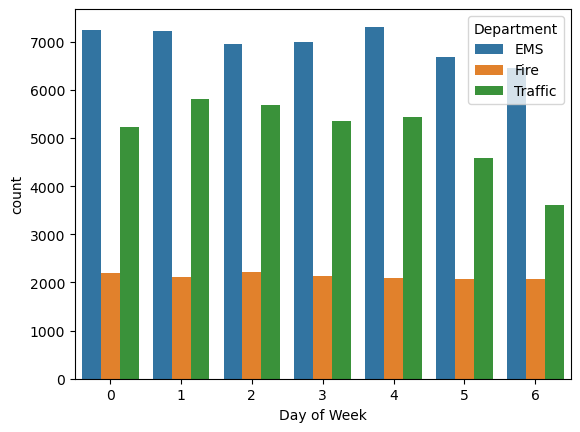

In [57]:
sns.countplot(x='Day of Week',data=df,hue='Department')

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

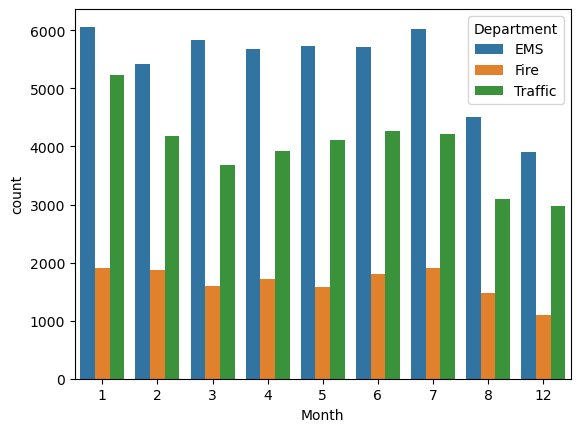

In [58]:
sns.countplot(x='Month',data=df,hue='Department')

In [59]:
byMonth=df.groupby('Month').count()

In [60]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**We notice that some of the values are missing when grouping the dataset by month**

*Taking the assumption that a call must have taken place if there is a latitude or longitude value available*

<Axes: xlabel='Month'>

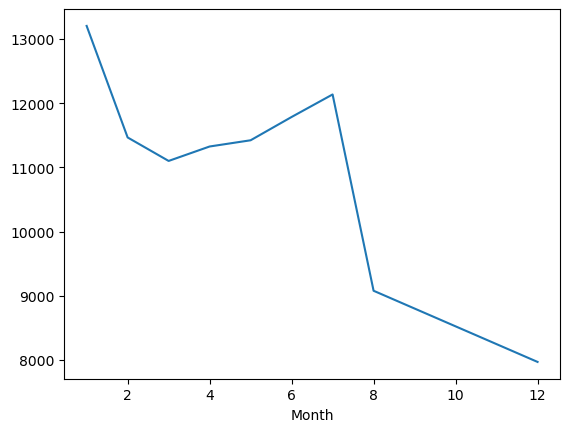

In [61]:
byMonth['lat'].plot()

<Axes: xlabel='Month', ylabel='count'>

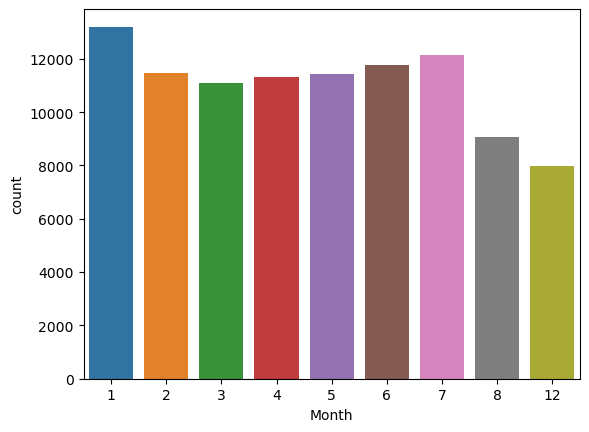

In [62]:
sns.countplot(x='Month',data=df)

In [66]:
type(byMonth)

pandas.core.frame.DataFrame

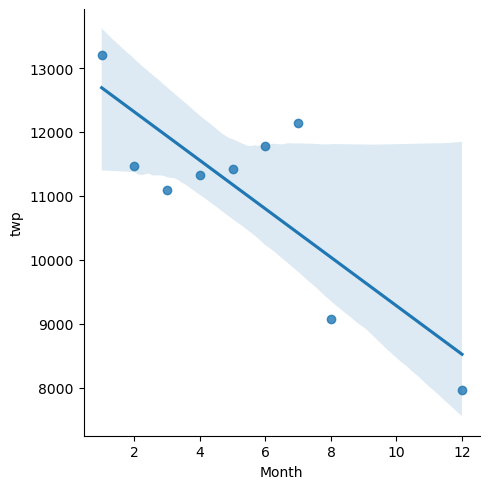

In [64]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [68]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [70]:
t=df['timeStamp']

In [71]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,2015-12-10


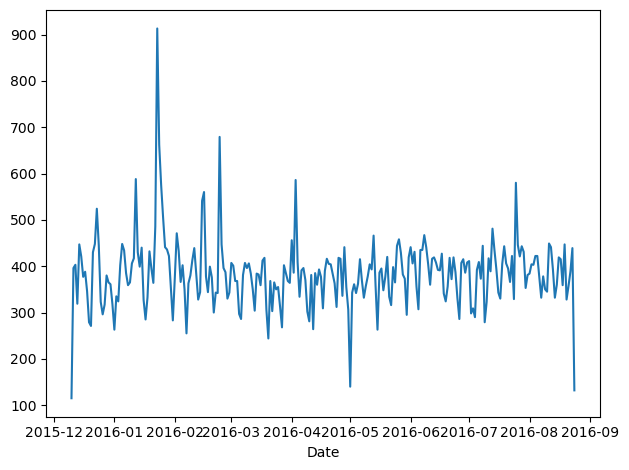

In [78]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

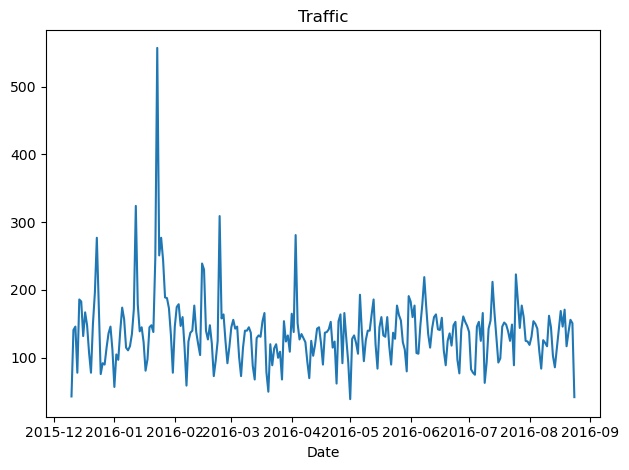

In [83]:
df[df['Department']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

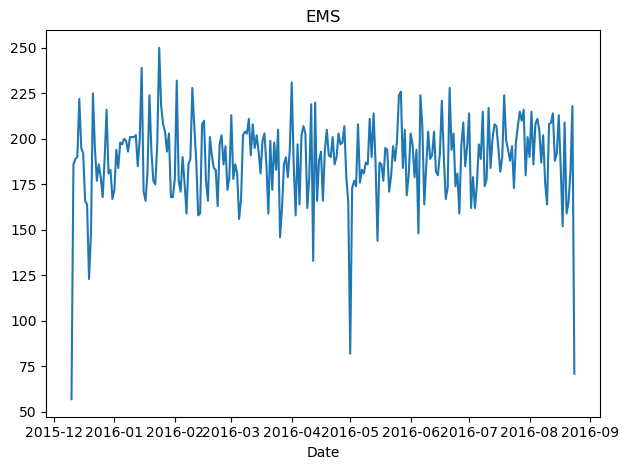

In [84]:
df[df['Department']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

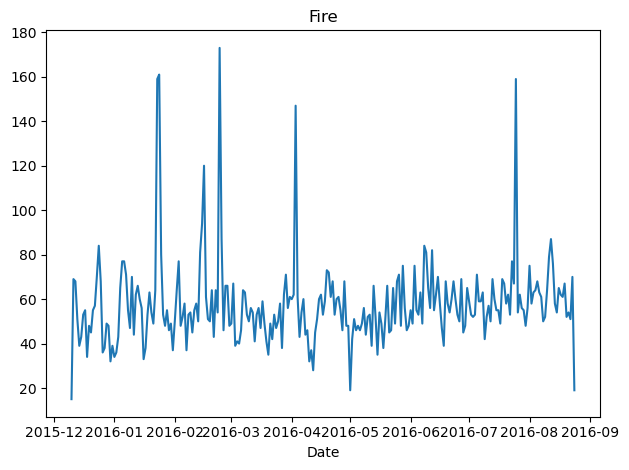

In [85]:
df[df['Department']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [105]:
dayHour= df.groupby(by=['Day of Week','Hour']).count()['Department'].unstack()

In [106]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<Axes: xlabel='Hour', ylabel='Day of Week'>

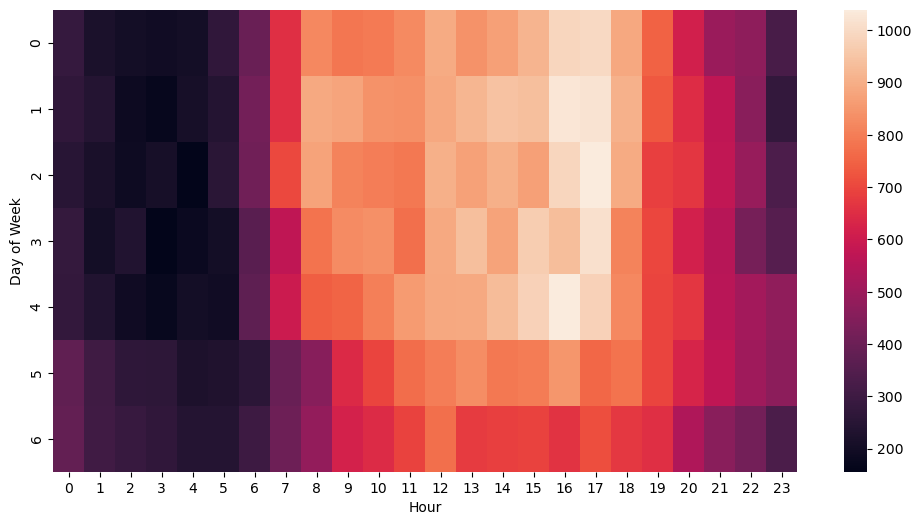

In [121]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

**Clustermap using this DataFrame**

<Figure size 1200x600 with 0 Axes>

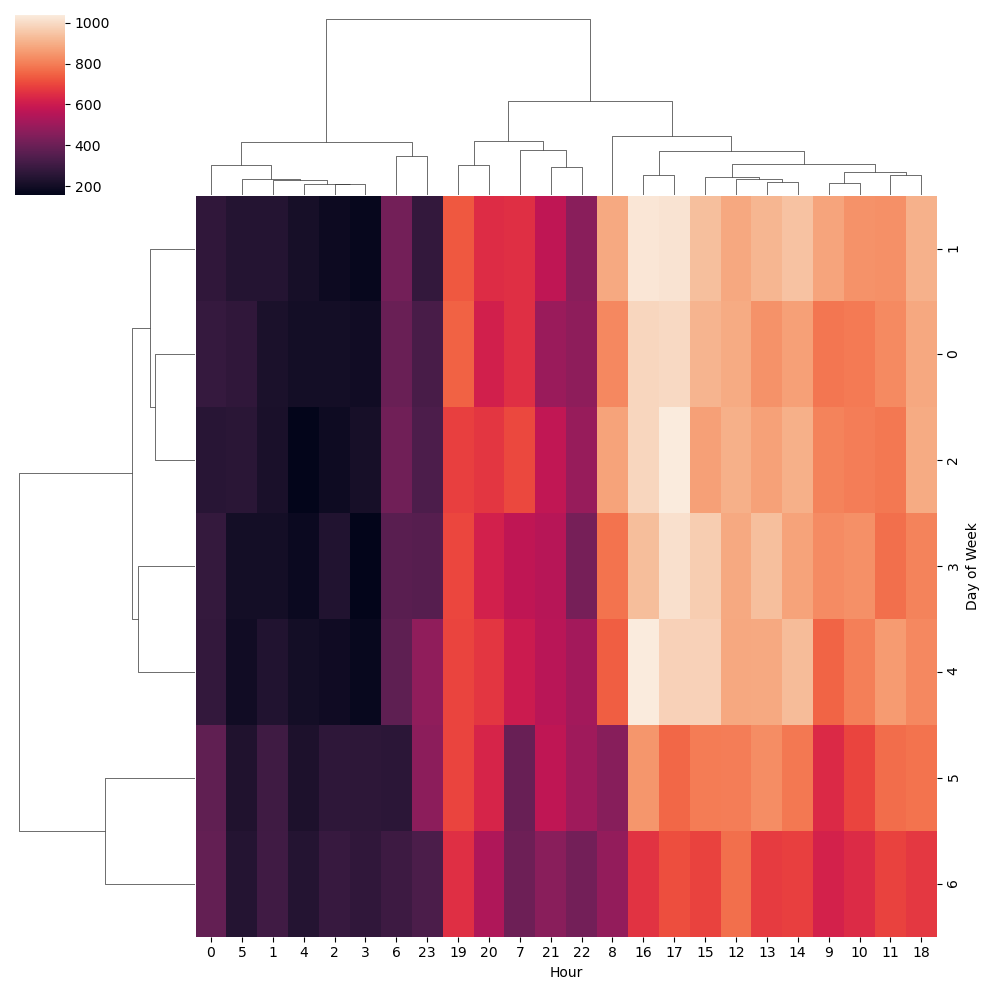

In [120]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour)


In [112]:
dayMonth= df.groupby(by=['Day of Week','Month']).count()['Department'].unstack()


<Axes: xlabel='Month', ylabel='Day of Week'>

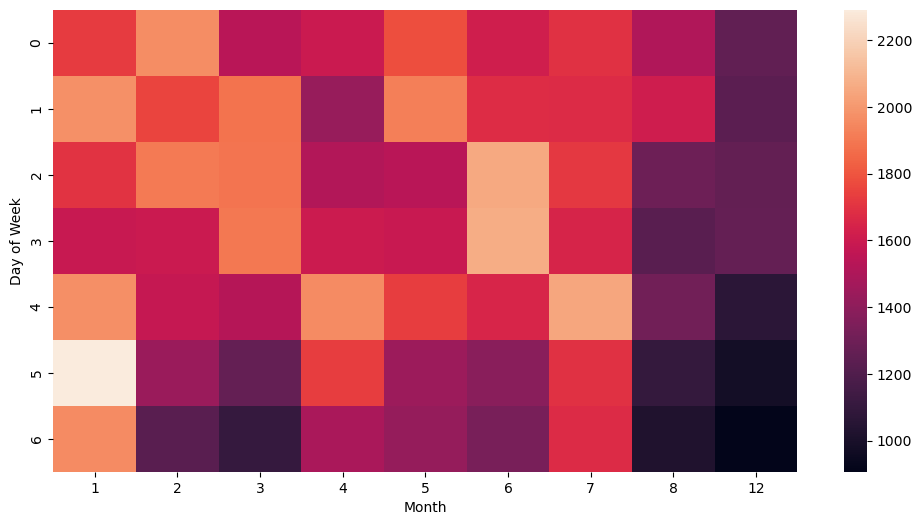

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

<Figure size 1200x600 with 0 Axes>

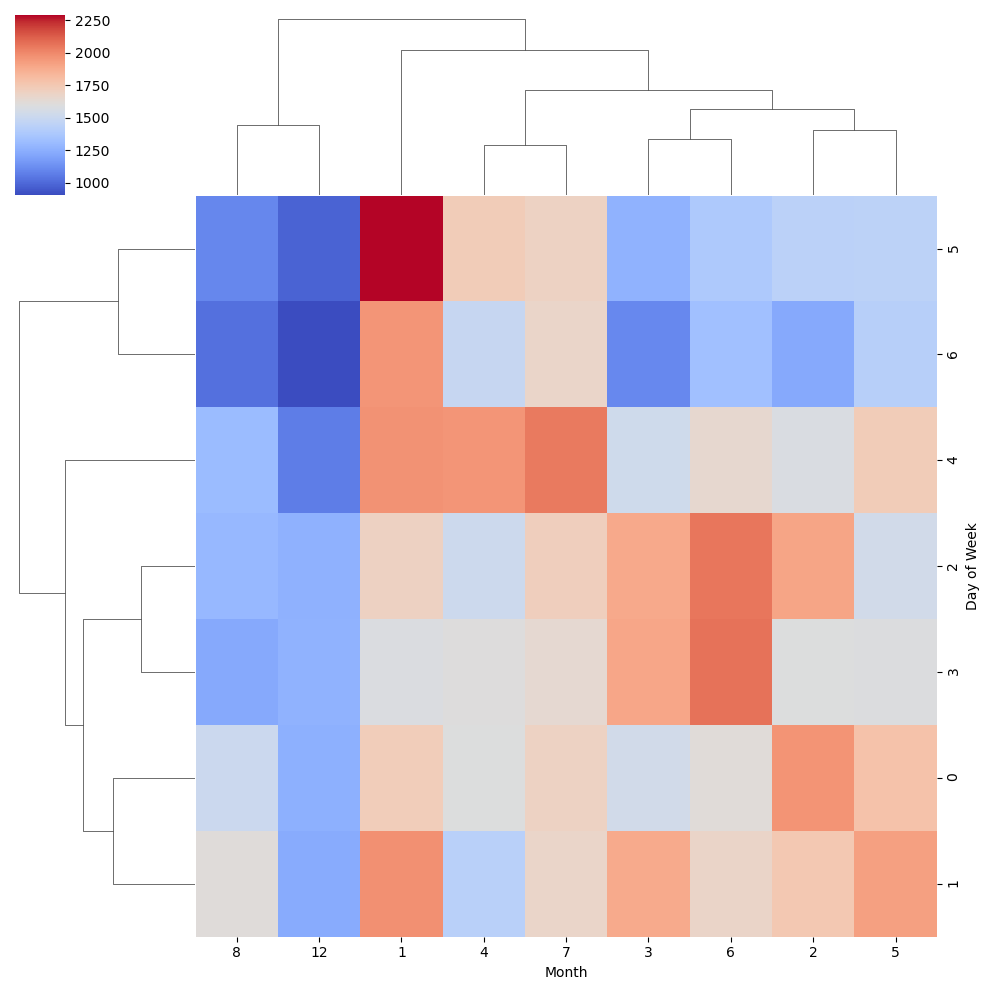

<Figure size 1200x600 with 0 Axes>

In [122]:
sns.clustermap(dayMonth,cmap='coolwarm')
plt.figure(figsize=(12,6))

***There aren't much calls between midnight and 5 AM, as many people must be asleep. Most of the calls for EMS and traffic accidents happens during the day time. Saturday and sunday are with less calls in comparision to weekdays. We can see in the month of january on Friday we see a lot of calls in comparision to the rest of the data*** 